<a href="https://colab.research.google.com/github/architaw/ImageProcessingAssignments/blob/master/Assignment_1_Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Copyright 2020 IITK EE604A Image Processing. All Rights Reserved.
# 
# Licensed under the MIT License. Use and/or modification of this code outside of EE604 must reference:
#
# © IITK EE604A Image Processing 
# https://github.com/ee604/ee604_assignments
#
# Author: Shashi Kant Gupta, Chiranjeev Prachand and Prof K. S. Venkatesh, Department of Electrical Engineering, IIT Kanpur

# Task 2: Image resizing (Upsampling / Downsampling)

Note that in digital image processing upsampling or downsampling simply means resizing your image. When you upsample you zoom the image and vice-versa. We will use two different spatial domain approach (interpolation method) to achieve this:
1. Nearest Neighbour interpolation/ Pixel replication method [Wiki](https://en.wikipedia.org/wiki/Nearest-neighbor_interpolation)
2. Bilinear interpolation method [Wiki](https://en.wikipedia.org/wiki/Bilinear_interpolation)

In this assignment we will will not analyse the frequency domain signal.

In [3]:
%%bash
pip install git+https://github.com/ee604/ee604_plugins

  Cloning https://github.com/ee604/ee604_plugins to /tmp/pip-req-build-v20e37l3
  Created wheel for ee604-plugins: filename=ee604_plugins-0.1.4-cp36-none-any.whl size=2305 sha256=484fb488179a7abf1fd25788035e838f5adbc905d4f961177f5826fc794dcf90
  Stored in directory: /tmp/pip-ephem-wheel-cache-azu6e7p1/wheels/34/a8/1d/ae3b7d209ecde89b4800a47ec55a61e7503bb9548bbb975806
Successfully built ee604-plugins


  Running command git clone -q https://github.com/ee604/ee604_plugins /tmp/pip-req-build-v20e37l3


In [4]:
# Importing required libraries

import cv2
import numpy as np
import matplotlib.pyplot as plt

from ee604_plugins import download_dataset, cv2_imshow

download_dataset(assignment_no=1, task_no=2) # download data for this assignment

Download Complete!


In [5]:
data = cv2.imread("data/parallel_lines.jpg")
img = data

In [6]:
def resize_nn(img, k=1):
    '''
    Write a program to resample the given image by a factor 'k' using Nearest Neighbour method
    
    Inputs:
    + img - Original image
    + k - resampling factor, therefore if input image size is 300x300 
        - and k=0.5 ==> output image size = 150x150
    
    Ouputs:
    + out_img - numpy array (of dtype np.uint8) containing the output image.
    
    Allowed external package:
    + You are not allowed to use any cv2 resize module or any other external package. 
    
    '''
    
    #############################
    # Start your code from here #
    #############################
    a, b = img.shape[:2]

    newX = int(a*k)
    newY = int(b*k)
    scaleX = newX/(a-1)
    scaleY = newY/(b-1)

    out_img = np.zeros([newX, newY, 3])
    for i in range(newX-1):
      for j in range(newY-1):
        out_img[i+1, j+1] = img[1+int(i/scaleX), 1+int(j/scaleY)]
    #############################
    # End your code here ########
    #############################    
    
    return out_img

In [20]:
def resize_bilinear(img, k=1):
    '''
    Write a program to resample the given image by a factor 'k' using Bilinear interpolation method.
    
    Inputs:
    + img - Original image
    + k - resampling factor
    
    Ouputs:
    + out_img - numpy array (of dtype np.uint8) containing the output image.
    
    Allowed external package:
    + You are not allowed to use any cv2 resize module or any other external package. 
    
    '''
    
    #############################
    # Start your code from here #
    #############################
    
    a, b = img.shape[:2]
    newX = int(a*k)
    newY = int(b*k)
    scaleX = float(a - 1) / (newX - 1)
    scaleY = float(b - 1) / (newY - 1)
    out_img = np.zeros([newX, newY, 3])
    for i in range(newX):
      for j in range(newY):
        x_l, y_l = int(scaleX * i), int(scaleY * j)
        if int(scaleX * i) == scaleX*i:
          x_h = scaleX*i
        else:
          x_h = 1+ int(scaleX * i)
        if int(scaleY * j) == scaleY*j:
          y_h = scaleY*j
        else:
          y_h = 1+ int(scaleY * j)
        
        x_weight = (scaleX * i) - x_l
        y_weight = (scaleY * j) - y_l        

        a1 = img[x_l, y_l]
        b1 = img[x_l, int(y_h)]
        c1 = img[int(x_h), y_l]
        d1 = img[int(x_h), int(y_h)]
        
        out_img[i][j] = a1 * (1-y_weight) * (1-x_weight) \
                      + b1 * (y_weight) * (1-x_weight) \
                      + c1 * (x_weight) * (1-y_weight) \
                      + d1 * (y_weight) * (y_weight) 


    #############################
    # End your code here ########
    #############################    
    
    return out_img

#### Sample the given image for following values of k = 0.5, 0.51, 0.99, 2, 2.1 using both the methods. 
Plot the images using `cv2_imshow` and write your observation on the differences with an intuitive explanation.


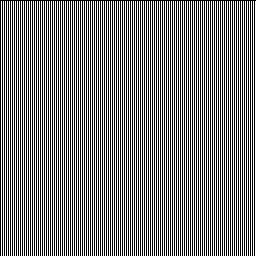

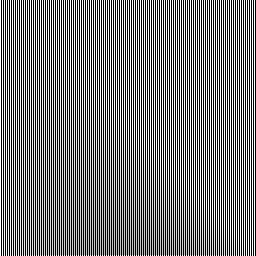

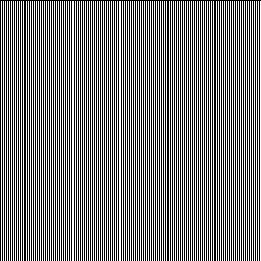

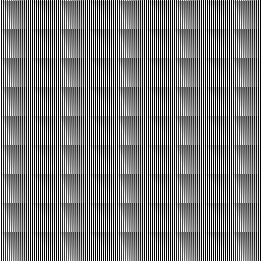

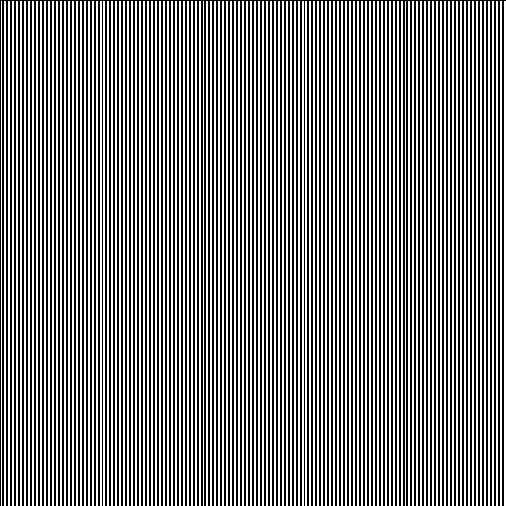

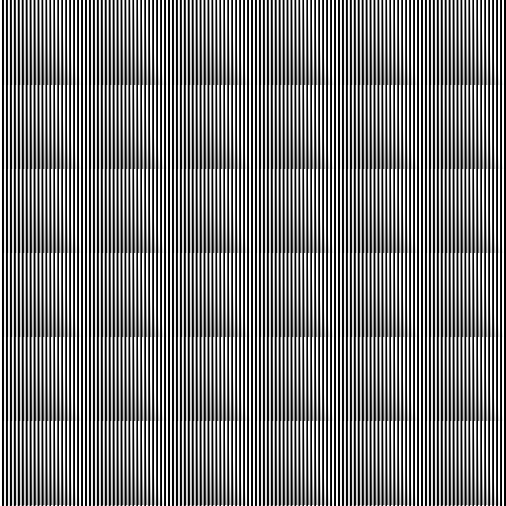

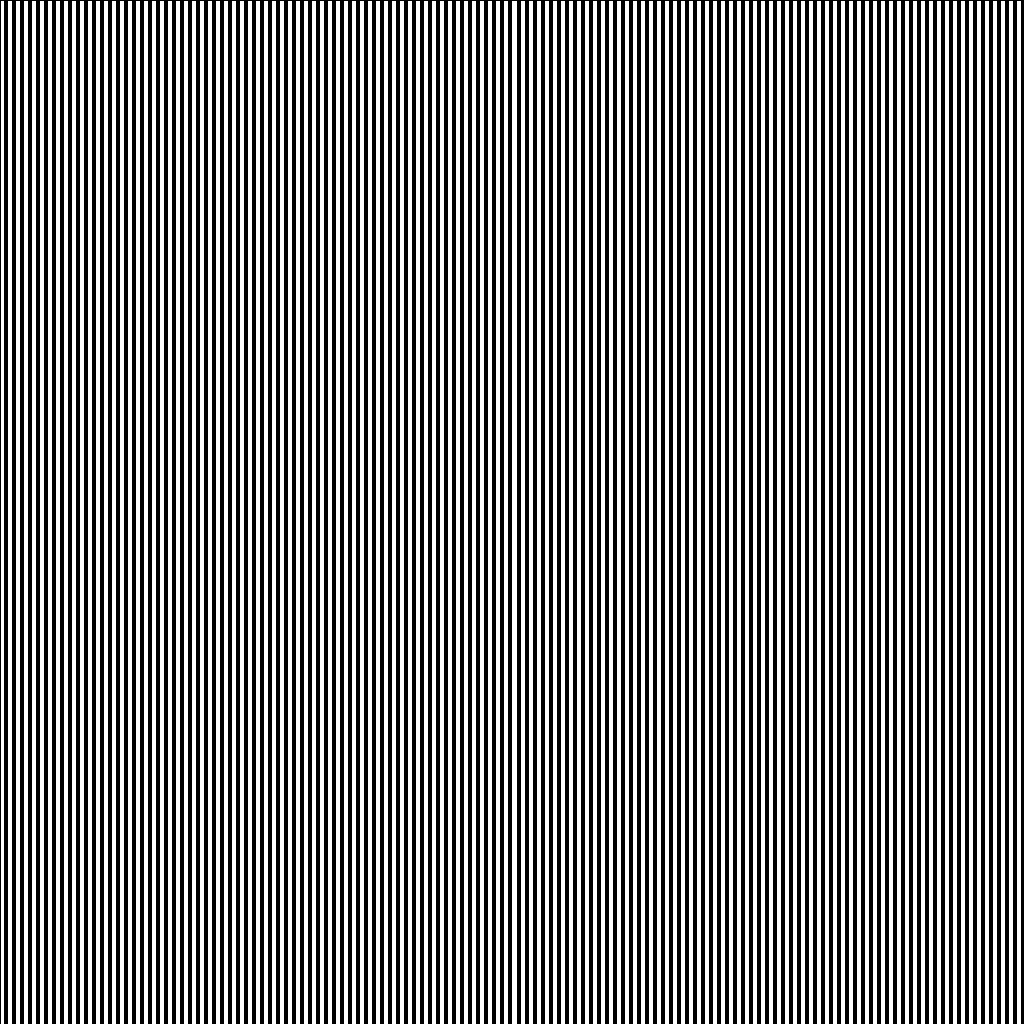

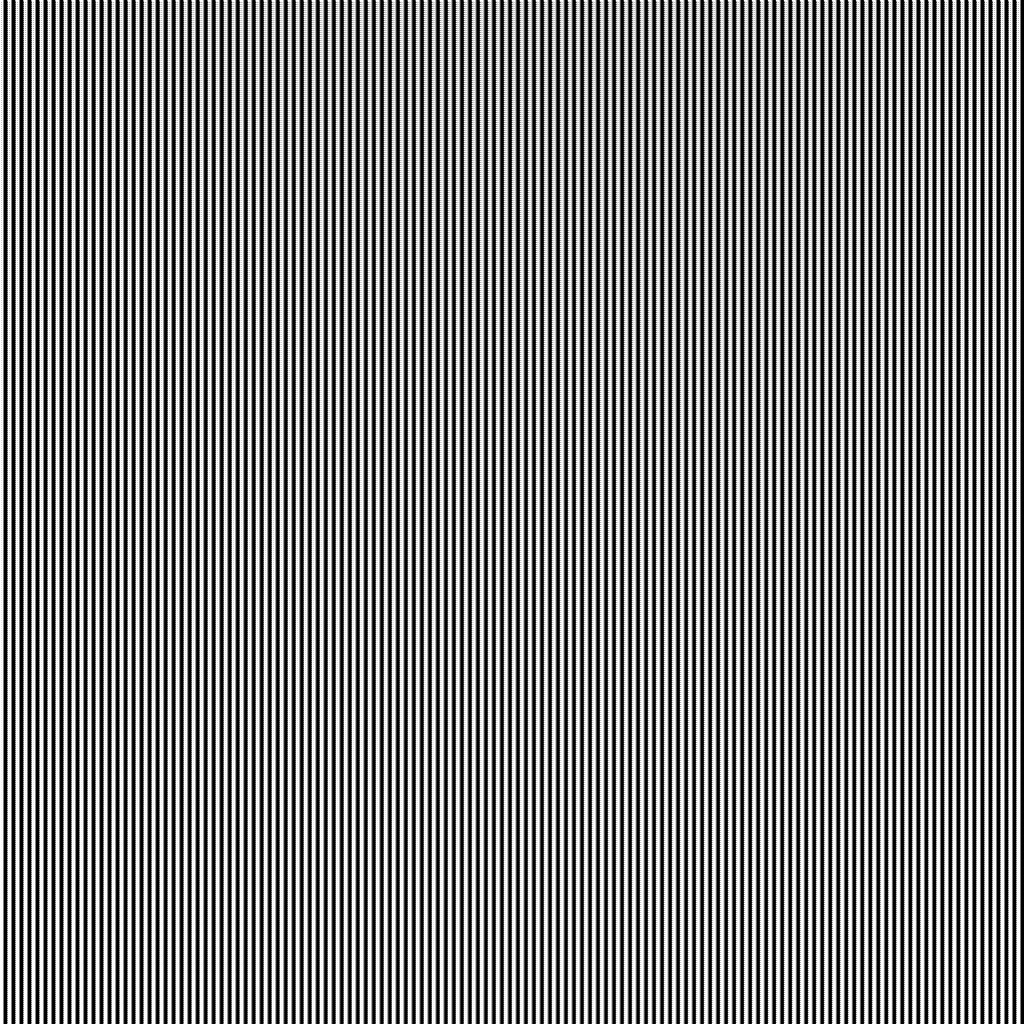

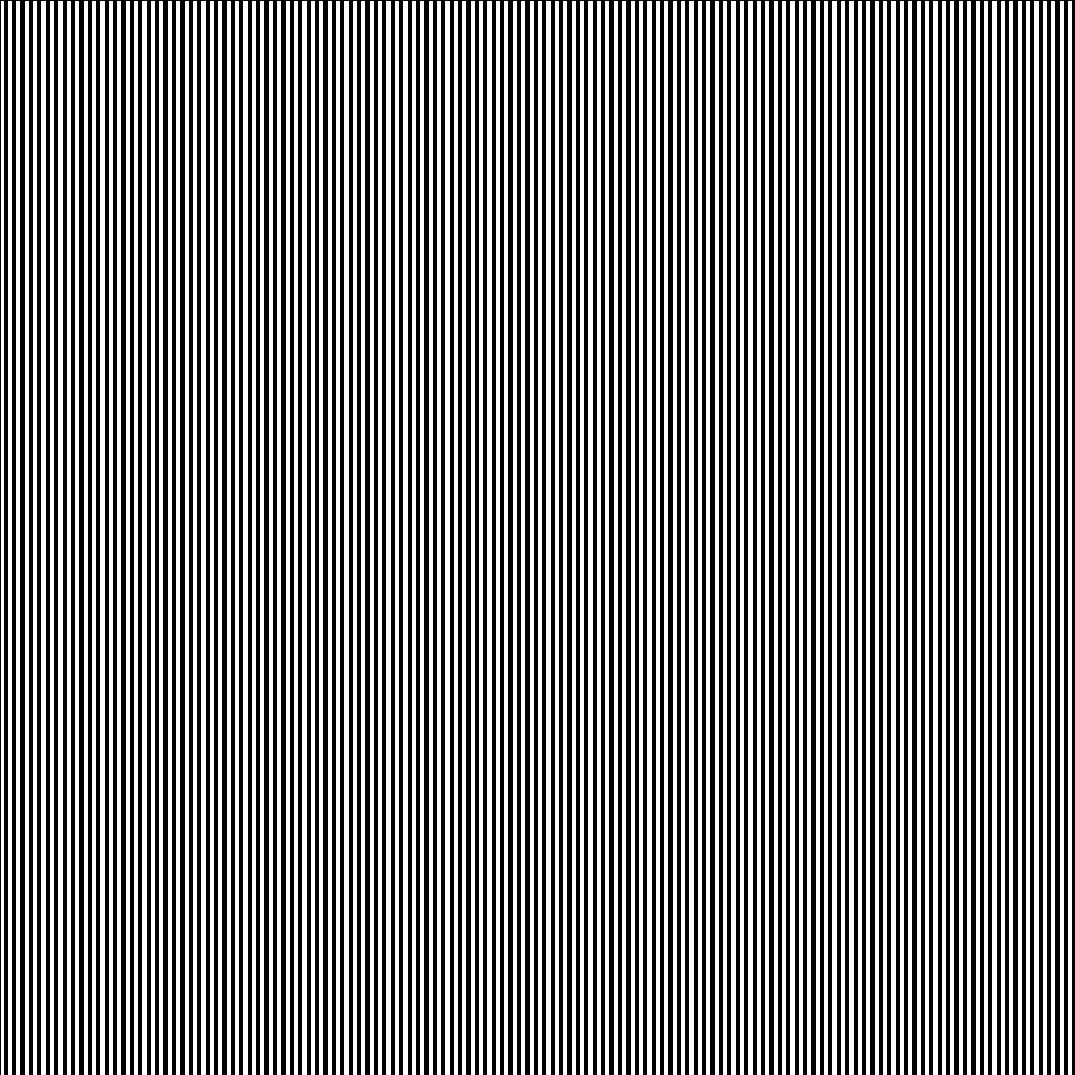

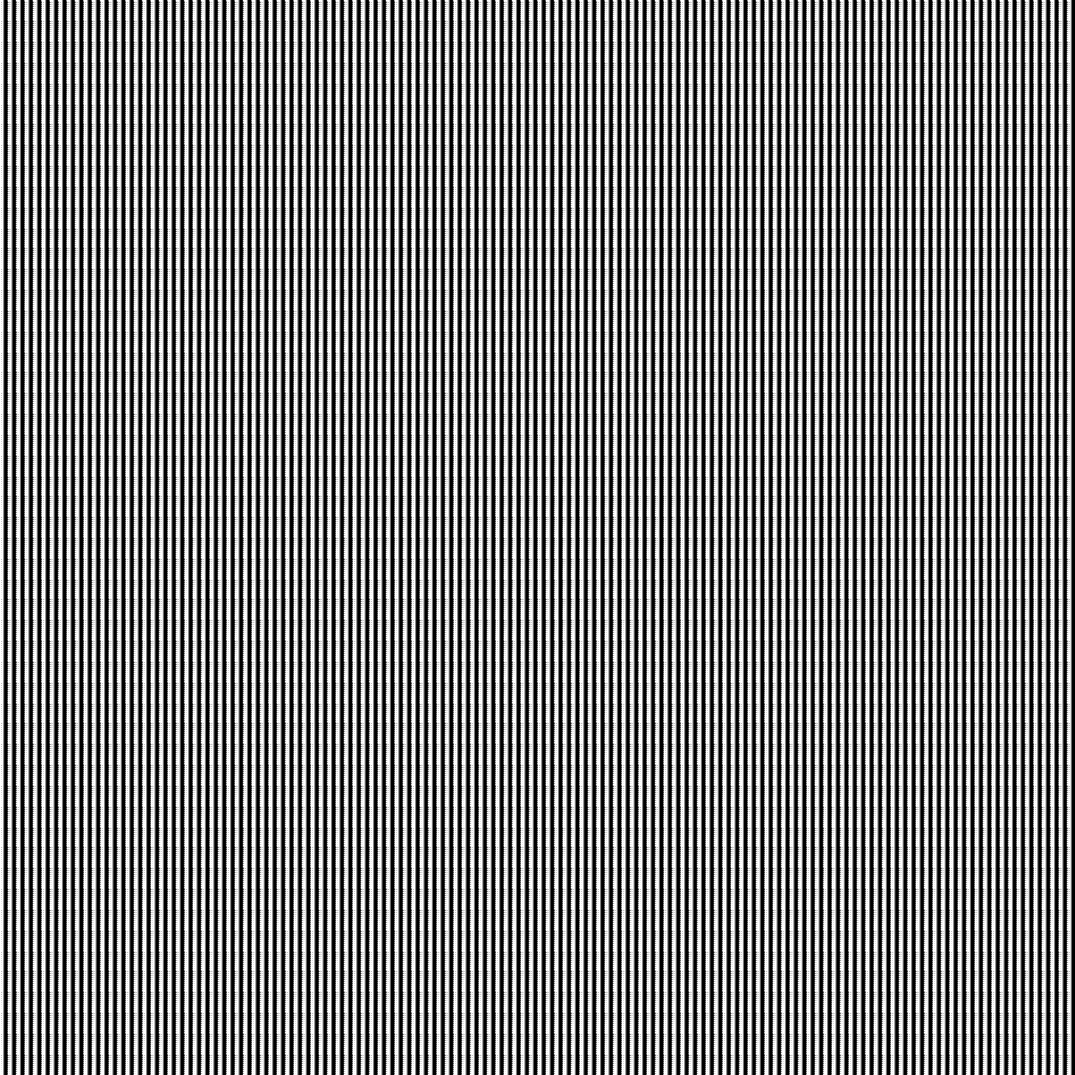

In [24]:
orig_img = np.copy(data) # Resample this image

#############################
# Start your code from here #
#############################
img1 = resize_nn(img, 0.5)
cv2_imshow(img1)
img1 = resize_bilinear(img, 0.5)
cv2_imshow(img1)
img1 = resize_nn(img, 0.51)
cv2_imshow(img1)
img1 = resize_bilinear(img, 0.51)
cv2_imshow(img1)
img1 = resize_nn(img, 0.99)
cv2_imshow(img1)
img1 = resize_bilinear(img, 0.99)
cv2_imshow(img1)
img1 = resize_nn(img, 2)
cv2_imshow(img1)
img1 = resize_bilinear(img, 2)
cv2_imshow(img1)
img1 = resize_nn(img, 2.1)
cv2_imshow(img1)
img1 = resize_bilinear(img, 2.1)
cv2_imshow(img1)
#############################
# End your code here ########
#############################  

In [ ]:
your_observation = """
Replace this with your observations.
"""

print(your_observation)


Replace this text with your observations.

